In [1]:
%matplotlib inline
%pylab inline

import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Settin some print options
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 500)

In [3]:
# Reading the data
df_train = pd.read_csv('House Prices/train.csv')
train_prices = df_train['SalePrice']

# Dropping SalePrice from training DF (this is what we're predicting)
df_train_data = df_train.drop('SalePrice', axis=1)

# SalePrice is not in this dataset, obviously
df_test = pd.read_csv('House Prices/test.csv')

df_all = pd.concat([df_train_data, df_test])

In [4]:
df_train_data.shape

(1460, 80)

In [5]:
df_test.shape

(1459, 80)

In [6]:
# 1460 samples, 80 features 

In [7]:
#1.c: choosing features:
# YrSold
# GarageArea
# LotArea
# Neighborhood
# MSSubClass
# OverallQual
# GRLivArea

In [8]:
df_selected = df_train[['SalePrice', 'YrSold', 'GarageArea', 'LotArea','Neighborhood', 'MSSubClass', 'OverallQual', 'GrLivArea']].copy()

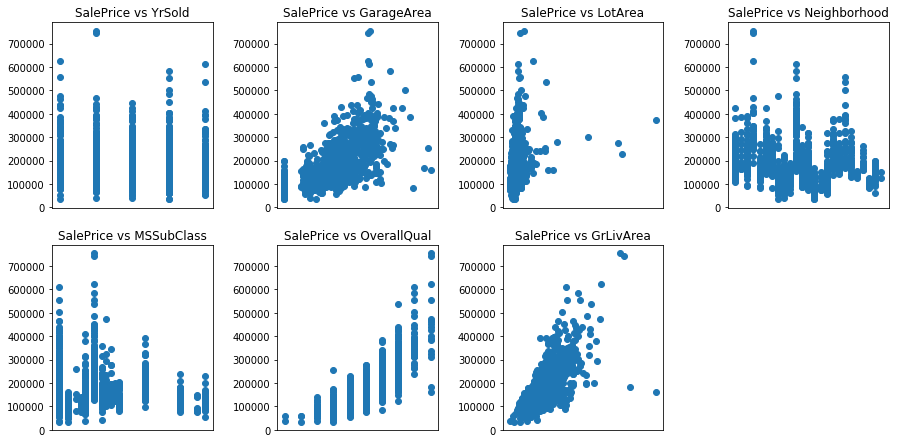

In [9]:
# Creating scatterplots
plt.figure(1, figsize=(15,7.5))

# this loop will plot 7 scatterplots
for i in range(7):
    plt.subplot(2, 4, i+1)
    plt.scatter(df_selected.iloc[:,i+1], df_selected['SalePrice'])
    plt.subplots_adjust(wspace=.4)
    plt.xticks([])
    plt.title('SalePrice vs ' + df_selected.columns[i+1])
    
plt.show()

In [10]:
df_train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939.0,RFn,1,

In [11]:
# Get number of unique values in each column

def count_Unique(data):
    unique_sum = data.nunique(axis=0, dropna=True)
    print(unique_sum)
    
count_Unique(df_all)

# List of categorical features to pass when creating dummies
cat_feature_list = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition']

print("Number of categorical features:",len(cat_feature_list))

Id               2919
MSSubClass         16
MSZoning            5
LotFrontage       128
LotArea          1951
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         118
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        444
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        991
BsmtFinType2        6
BsmtFinSF2        272
BsmtUnfSF        1135
TotalBsmtSF      1058
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF         1083
2ndFlrSF          635
LowQualFin

In [12]:
#Display occurences of no value:

def count_Nan(data):
    columns_wNull = data.columns[data.isnull().any(axis=0)]
    null_sums = data[columns_wNull].isnull().sum()
    print(null_sums)
 
count_Nan(df_all)

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64


In [13]:
df_all.shape

(2919, 80)

In [14]:
#Preprocessing the data
#1) filling the missing categorical values with None:

categorical_wNan = \
    ['Alley',
    'BsmtCond','BsmtQual','BsmtExposure',
    'BsmtFinType1', 'BsmtFinType2',
    'FireplaceQu',
    'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
    'PoolQC',
    'Fence',
    'MiscFeature', 'MasVnrType']
 
df_all.loc[:,categorical_wNan] = \
    df_all[categorical_wNan].fillna('None')

In [15]:
# Filling the missing numerical values with 0
numerical_wNan = \
    ['BsmtFullBath', 'BsmtHalfBath', 'TotalBsmtSF',
     'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
     'GarageArea', 'GarageCars']
 
df_all.loc[:,numerical_wNan] = \
    df_all[numerical_wNan].fillna(0)

In [16]:
# We assume that the year the garage was built was the same year the house was built
df_all.loc[:,'GarageYrBlt'] = df_all['GarageYrBlt'].fillna(df_all.YearBuilt)

In [17]:
count_Nan(df_all)

MSZoning         4
LotFrontage    486
Utilities        2
Exterior1st      1
Exterior2nd      1
MasVnrArea      23
Electrical       1
KitchenQual      1
Functional       2
SaleType         1
dtype: int64


In [18]:
# Filling in the missing values with mean and mode:
categorical_wNan = ['Electrical', 'MSZoning', 'Functional', 'Utilities', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'SaleType']
 
df_all.loc[:, categorical_wNan] = df_all[categorical_wNan].fillna(df_all[categorical_wNan].mode().iloc[0])
 
# LotFrontage is really the only messy one since we are filling in 486 missing values
numerical_wNan = ['MasVnrArea', 'LotFrontage']
 
df_all.loc[:, numerical_wNan] = df_all[numerical_wNan].fillna(df_all[numerical_wNan].median())

In [19]:
count_Nan(df_all)

Series([], dtype: float64)


In [20]:
df_all.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal


In [21]:
# Get dummies:
allData_wDummies = pd.get_dummies(df_all, columns=cat_feature_list, drop_first=True)

In [22]:
allData_wDummies.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFe

In [23]:
allData_wDummies.shape


(2919, 284)

In [24]:
# Dropping ID:
allData_wDummies = allData_wDummies.drop(['Id'], axis=1)

In [25]:
# Splitting up the prepared dataframes into train and test:
train_dummies = allData_wDummies.iloc[:1460,:]
test_dummies = allData_wDummies.iloc[1460:,:]

In [26]:
train_dummies.shape

(1460, 283)

In [27]:
results = sm.OLS(train_prices, sm.add_constant(train_dummies.astype(float))).fit()

In [28]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     61.94
Date:                Wed, 14 Nov 2018   Prob (F-statistic):               0.00
Time:                        19:33:30   Log-Likelihood:                -16555.
No. Observations:                1460   AIC:                         3.366e+04
Df Residuals:                    1186   BIC:                         3.511e+04
Df Model:                         273                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -7.065e+05   1.07e+06     -0.661      0.509    -2.8e+06    1.39e+06
LotFrontage              41.4054     44.297      0.935      0.350     -45.504     128.314
LotArea                   0.7023      0.110      6.377      0.000       0.486       0.918
OverallQual            6630.9457   1038.366      6.386      0.000    4593.708    8668.184
OverallCond            5718.4780    883.314      6.474      0.000    3985.446    7451.510
YearBuilt               365.5170     87.193      4.192      0.000     194.447     536.587
YearRemodAdd             97.6609     55.767      1.751      0.080     -11.751     207.073
MasVnrArea               22.6461      5.847      3.873      0.000      11.175      34.118
BsmtFinSF1               15.6544      2.926      5.349      0.000       9.913      21.396
BsmtFinSF2                8.9693      6.001      1.495      0.135      -2.804      20.742
BsmtUnfSF                -2.0776      2.786     -0.746      0.456      -7.544       3.389
TotalBsmtSF              22.5462      4.117      5.476      0.000      14.469      30.624
1stFlrSF                 19.7726      6.509      3.038      0.002       7.003      32.543
2ndFlrSF                 35.4198      5.524      6.412      0.000      24.581      46.258
LowQualFinSF            -29.1928     14.097     -2.071      0.039     -56.850      -1.535
GrLivArea                25.9996      5.786      4.494      0.000      14.648      37.352
BsmtFullBath           1861.9238   2002.553      0.930      0.353   -2067.017    5790.864
BsmtHalfBath             81.7479   3047.494      0.027      0.979   -5897.333    6060.828
FullBath               4226.6484   2235.026      1.891      0.059    -158.397    8611.693
HalfBath               2009.7555   2116.093      0.950      0.342   -2141.948    6161.459
BedroomAbvGr          -3489.3424   1409.271     -2.476      0.013   -6254.284    -724.401
KitchenAbvGr          -1.176e+04   6227.229     -1.889      0.059    -2.4e+04     457.440
TotRmsAbvGrd           1625.0585    968.123      1.679      0.094    -274.367    3524.484
Fireplaces             6269.6950   2570.463      2.439      0.015    1226.533    1.13e+04
GarageYrBlt             -47.7062     59.774     -0.798      0.425    -164.981      69.569
GarageCars             3864.2690   2293.880      1.685      0.092    -636.246    8364.785
GarageArea               18.3140      7.939      2.307      0.021       2.738      33.890
WoodDeckSF               15.4667      5.890      2.626      0.009       3.912      27.022
OpenPorchSF              -1.3131     11.760     -0.112      0.911     -24.386      21.760
EnclosedPorch             3.3278     12.593      0.264      0.792     -21.379      28.034
3SsnPorch                33.9589     22.444      1.513      0.131     -10.076      77.994
ScreenPorch            

In [29]:
# Begin part D
# Ordinary Least Squares with Sklearn

X = train_dummies
y = train_prices

scores = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=.2, shuffle=True)

    OLS = LinearRegression().fit(X_train, y_train)
    sc = OLS.score(X_test, y_test)
    scores.append(sc)
    
print(sum(scores)/len(scores))

0.4923344849638818


In [30]:
X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeatu

In [31]:
y_train.head()

854     170000
1158    235128
285     164700
894     118858
948     192500
Name: SalePrice, dtype: int64

In [32]:
# Begin remaining tests
# Standardizing the data
scaler = StandardScaler().fit(X_train.values)
X_train_scaled = scaler.transform(X_train.values)

X_test_scaled = scaler.transform(X_test.values)

In [33]:
y_train

854     170000
1158    235128
285     164700
894     118858
948     192500
322     301000
14      157000
878     148000
1008    240000
1345    108500
1366    193000
412     222000
950     129000
1395    281213
393     100000
596     114504
780     176000
275     205000
134     180000
804     118000
799     175000
1377    117000
880     157000
42      144000
969     140000
360     156000
958     185000
1102    135000
1291    119500
1374    250000
261     276000
1032    310000
113     217000
736      93500
1437    394617
371     134432
992     187000
1258    190000
565     128000
199     274900
655      88000
867     129000
576     145000
1023    191000
926     285000
648     155000
644     370878
774     395000
988     195000
1218     80500
724     320000
356     173000
274     124500
1169    625000
673     257500
805     227680
1288    278000
298     175000
420     206300
292     131000
816     137000
1387    136000
631     209500
400     245500
440     555000
651     108000
156     10

In [34]:
# KNN
numberList = range(1,30)
k_values = filter(lambda x: x % 2 != 0, numberList)

for k in k_values:
    knn = neighbors.KNeighborsRegressor(n_neighbors=k, weights='distance')
    knn.fit(X_train_scaled, y_train)
    pred = knn.predict(X_test)
    knn_results = cross_validate(knn, X_train_scaled,y_train, cv=10)
    k_result = sum(knn_results['test_score'])/10
    print('The cross-validated average testscore for k='+str(k)+' is: '+str(k_result))

The cross-validated average testscore for k=1 is: 0.4183229895134474
The cross-validated average testscore for k=3 is: 0.6929788578689665
The cross-validated average testscore for k=5 is: 0.7266675455694132
The cross-validated average testscore for k=7 is: 0.7370171335160315
The cross-validated average testscore for k=9 is: 0.7378729285976858
The cross-validated average testscore for k=11 is: 0.7389519695061181
The cross-validated average testscore for k=13 is: 0.738495530710862
The cross-validated average testscore for k=15 is: 0.7374585220991441
The cross-validated average testscore for k=17 is: 0.7325240807920779
The cross-validated average testscore for k=19 is: 0.7273596334407023
The cross-validated average testscore for k=21 is: 0.7231766962279266
The cross-validated average testscore for k=23 is: 0.7159673152400672
The cross-validated average testscore for k=25 is: 0.7118520860091175
The cross-validated average testscore for k=27 is: 0.7103158309833009
The cross-validated averag

In [35]:
# Ridge
for alpha in [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0]:
    ridge = RidgeCV(alphas=[alpha]).fit(X_train_scaled, y_train)
    ridge_results = cross_validate(ridge, X_train_scaled,y_train, cv=10)
    alpha_result = sum(ridge_results['test_score'])/10
    print('The cross-validated average testscore for alpha='+str(alpha)+' is: '+str(alpha_result))

The cross-validated average testscore for alpha=0.01 is: 0.6402718213785972
The cross-validated average testscore for alpha=0.1 is: 0.7282369771996235
The cross-validated average testscore for alpha=1.0 is: 0.796466338624068
The cross-validated average testscore for alpha=10.0 is: 0.8131478123379521
The cross-validated average testscore for alpha=100.0 is: 0.842912305759465
The cross-validated average testscore for alpha=1000.0 is: 0.8489747123711492
The cross-validated average testscore for alpha=10000.0 is: 0.661823368143392
The cross-validated average testscore for alpha=100000.0 is: 0.19119160342094293


In [36]:
# Lasso
for alpha in [10, 100, 1000]:
    lasso = LassoCV(n_alphas=alpha).fit(X_train_scaled, y_train.values.ravel())
    lasso_result = cross_validate(lasso, X_train_scaled,y_train.values.ravel(), cv=10)
    alpha_eps = sum(lasso_result['test_score'])/10
    print('The cross-validated average testscore for alpha='+str(alpha)+' is: '+str(alpha_eps))

The cross-validated average testscore for alpha=10 is: 0.8437854379514504


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


The cross-validated average testscore for alpha=100 is: 0.8415437502139943
The cross-validated average testscore for alpha=1000 is: 0.8421035942408448


In [37]:
X_train_scaled.shape[1]

283

In [38]:
df_train_data.shape

(1460, 80)

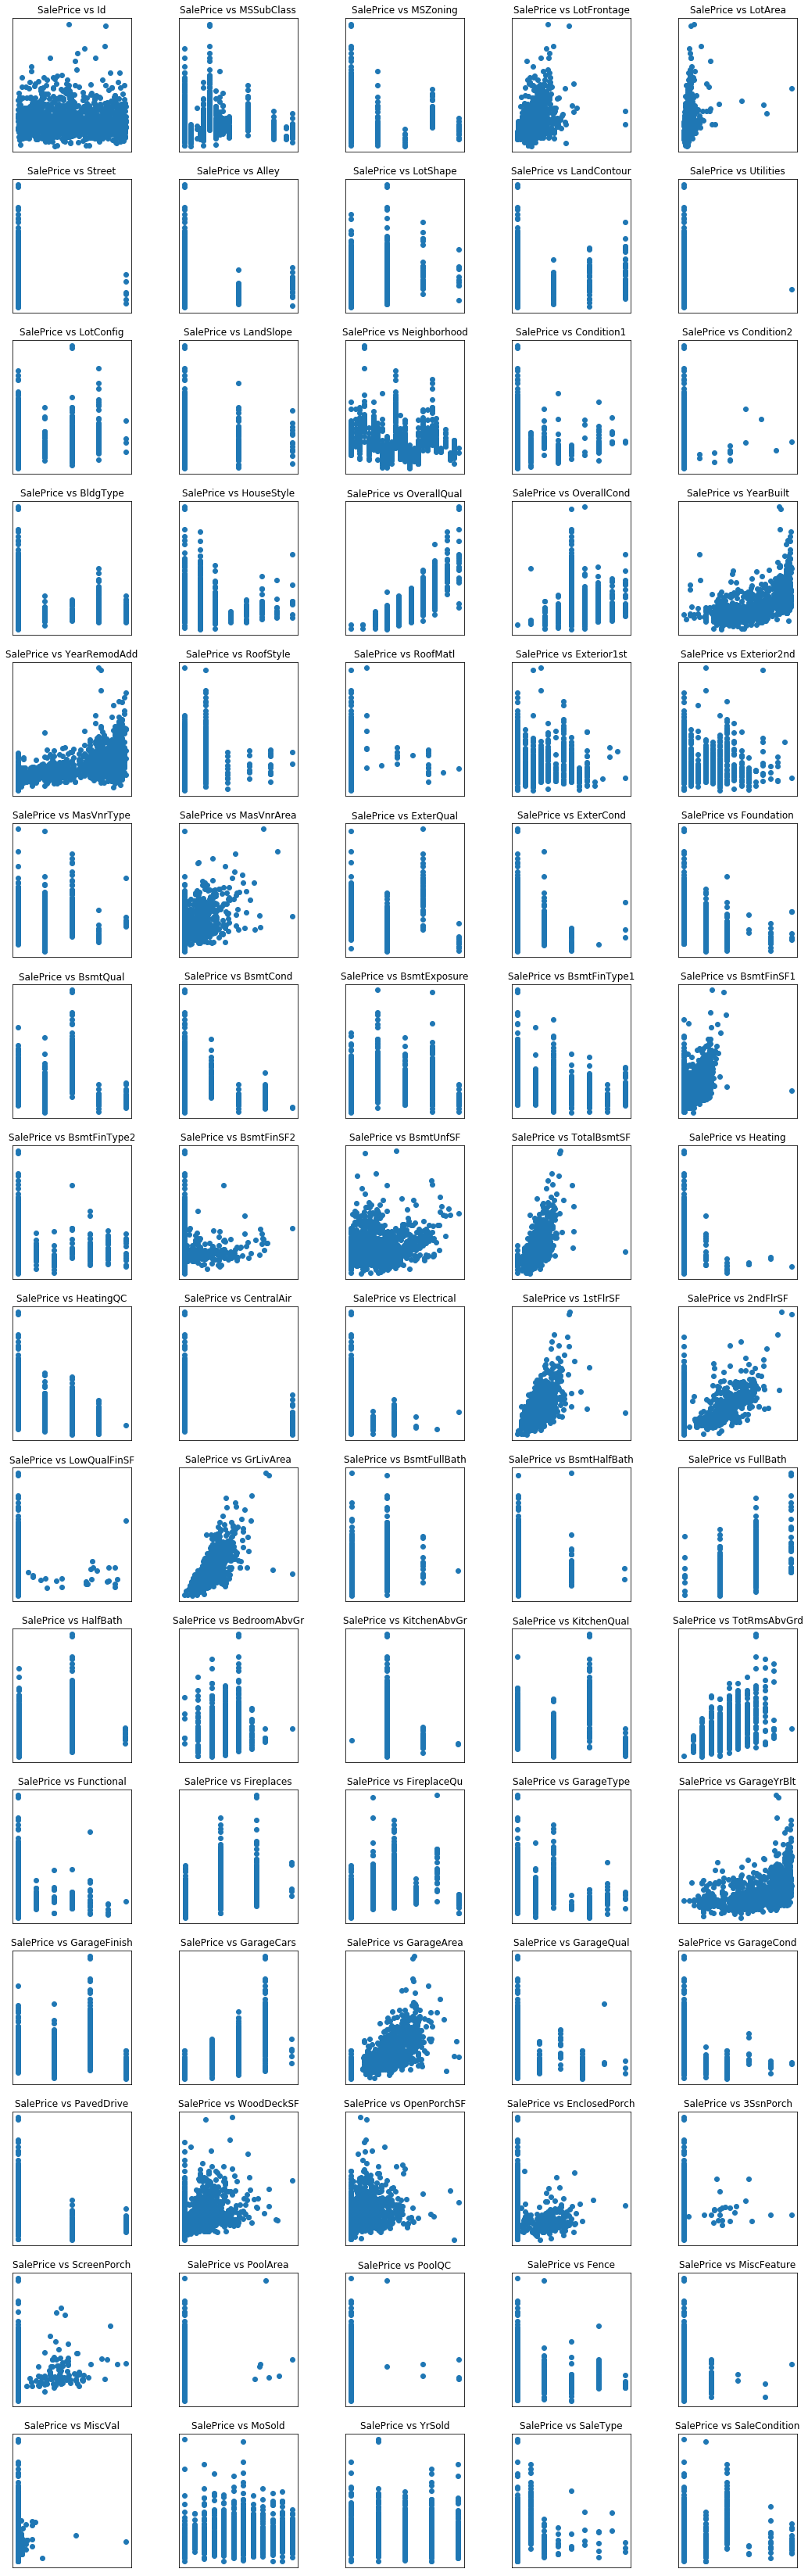

In [39]:
# this loop will plot 80 scatterplots
plt.figure(1, figsize(18, 60))
for i in range(80):
    plt.subplot(16, 5, i+1)
    if df_train_data.iloc[:,i].dtype != 'object':
        plt.scatter(df_train_data.iloc[:,i], df_train['SalePrice'])
        plt.subplots_adjust(wspace=.4)
        plt.xticks([])
        plt.yticks([])
        plt.title('SalePrice vs ' + df_train_data.columns[i])
    else:
        plt.scatter(np.array(df_train_data.iloc[:,i]).astype(np.unicode), df_train['SalePrice'])
        plt.subplots_adjust(wspace=.4)
        plt.xticks([])
        plt.yticks([])
        plt.title('SalePrice vs ' + df_train_data.columns[i])        
    
plt.show()

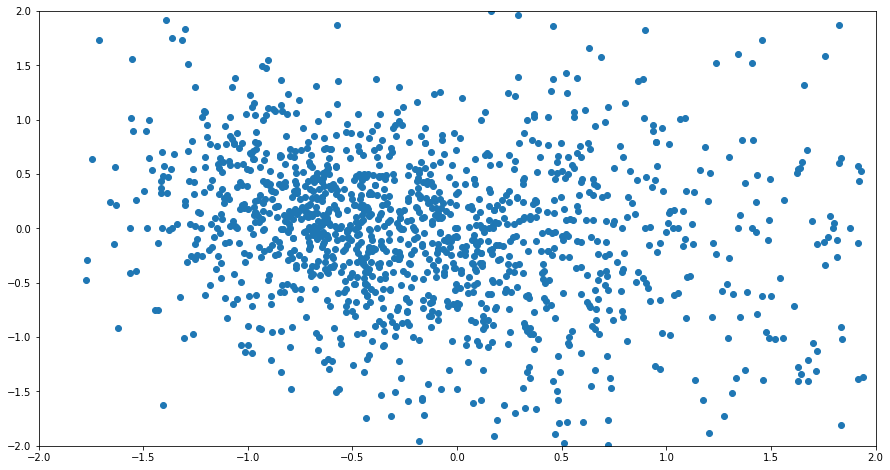

In [40]:
resids = np.array(results.resid).reshape(-1,1)
preds = np.array(results.predict().reshape(-1,1))

# transform residuals and predictors
scaler = StandardScaler().fit(resids)
std_resid = scaler.transform(resids)

scaler = StandardScaler().fit(preds)
std_pred = scaler.transform(preds)

plt.figure(1, figsize=(15,8))
plt.scatter(std_pred, std_resid)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.show()

In [41]:
# Standardizing the data
# I'm standardizing again because we need to sort the indexes for this model (so maybe just sort earlier)
scaler = StandardScaler().fit(X_train.values)
X_train_scaled = scaler.transform(X_train.sort_index().values)

X_test_scaled = scaler.transform(X_test.sort_index().values)

y_train_sorted = y_train.sort_index().reset_index()
y_train_sorted = y_train_sorted.drop('index', axis=1)

In [42]:
#Backwards stepwise regression:

# Note: The cross validation was not actually completed for this part of the project.

# Algorithm:
# 1. Start with all features and regress them against the dependent variable.
# 2. Get the feature with the worst P-Value, remove it from the list of features
# 3. Repeat the process until we are only left with features under a certain P-value

cols = X_train.columns
X_opt = pd.DataFrame(X_train_scaled, columns=cols) # X_opt will represent our optimal features
SL = 0.001 # Significance level; we only want features that score under this P-value
min_features = 5; # the minimum number of features you want

while True:
    # Fit all current features against Y
    OLS = LinearRegression().fit(X_opt, y_train)

    # Get the index of the P-Value of the worst feature (highest P-Value)
    pvalues = sm.OLS(y_train_sorted, sm.add_constant(X_opt)).fit().pvalues
    worst_pInd = pvalues[pvalues == max(pvalues)].index[0]

    # If the P-value is over the SL, we continue:
    if max(pvalues) > SL and len(pvalues) > min_features:
        # Remove that column from X_opt
        X_opt = X_opt.drop(worst_pInd, axis=1)
    else: # else we are finished
        break

In [43]:
X_opt.shape

(1168, 35)

In [44]:
# Forward stepwise regression:

# Algorithm -
# 1. Check each independent variable against SalePrice
# 2. The one with the lowest P-value is the winner, we'll keep it
# 3. Now check each independent variable plus the one we just got in step 2 against SalePrice
# 4. Check those variables for the one with lowest P-value, keep it. Now we have the best 2 independent variables
# 5. Check those 2 variables plus a new 3rd one against SalePrice... keep the best one... etc.
# 6. Continue until you have chosen k variables (or reached a certain unacceptable P-value)

In [45]:
# We really need column names so let's turn X into a DataFrame
cols = X_train.columns
X = pd.DataFrame(X_train_scaled, columns=cols)

pvalues = [] # will track column pvalues
best_features = [] # the list (by index) of our best features
remaining_features = list(range(X.shape[1])) # list of features still left (not in best features)
k = 10 # number of features to use

for best_feature in range(k):
    # First we need to regress the SalePrice against each independent variable, plus any variables already in our best feature list
    for i in remaining_features:
        # Do OLS on a new column + all the best ones
        OLS = LinearRegression().fit(X.iloc[:,best_features + [i]], y_train)
        
        pvalue = sm.OLS(y_train_sorted, sm.add_constant(X.iloc[:,best_features + [i]])).fit().pvalues

        # track the P-Value of the new feature we regressed on
        pvalues.append(pvalue[best_feature + 1])
            
    # Then we keep the dependent variable with the best (lowest) P-Value
    # Get index of min value
    min_pInd = pvalues.index(min(pvalues))
    
    # That's only its index in the pvalue list though, it doesn't tell us the real feature index
    real_ind = remaining_features[min_pInd]
    
    # Clear the list
    pvalues = []
    
    # add the feature to our feature list
    best_features.append(real_ind)
    
    # remove the best feature from the remaining feature list
    remaining_features.remove(real_ind)
    
print(X.columns[best_features])


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Index(['OverallQual', 'GrLivArea', 'BsmtFinSF1', 'SaleType_New',
       'Condition2_PosN', 'TotalBsmtSF', 'GarageArea', 'Neighborhood_NridgHt',
       'BsmtExposure_Gd', 'KitchenAbvGr'],
      dtype='object')
